In [24]:
import io
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data_dir = '..\\data\\raw'
file_name = 'uber_data.csv'
file_path = os.path.join(data_dir, file_name)


In [15]:
df = pd.read_csv(file_path)

# Display the first few rows of the dataset.

In [17]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


# Get basic information about the dataset.
## Check the data types of each column.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

# Get summary statistics.

In [19]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.88327,1.929170,3.034270,-73.288983,40.375220,1.040120,-73.312418,40.388064,1.337770,13.252608,0.101695,0.497000,1.872531,0.367415,0.299496,16.390721
std,0.32110,1.589408,3.846951,7.089652,3.901413,0.284238,6.964171,3.833974,0.481356,11.685574,0.202166,0.042673,2.618611,1.527758,0.016642,14.437180
min,1.00000,0.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-47.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-47.300000
25%,2.00000,1.000000,0.990000,-73.990959,40.738891,1.000000,-73.990547,40.738541,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.00000,1.000000,1.670000,-73.980202,40.755299,1.000000,-73.978416,40.755079,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,2.00000,2.000000,3.200000,-73.964203,40.769021,1.000000,-73.962090,40.767910,2.000000,15.000000,0.000000,0.500000,2.460000,0.000000,0.300000,18.300000
max,2.00000,6.000000,184.400000,0.000000,41.204548,6.000000,0.000000,42.666893,4.000000,819.500000,4.500000,0.500000,125.880000,25.540000,0.300000,832.800000


# Check missing values.

In [20]:
missing_values = df.isnull().sum()
print(missing_values)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


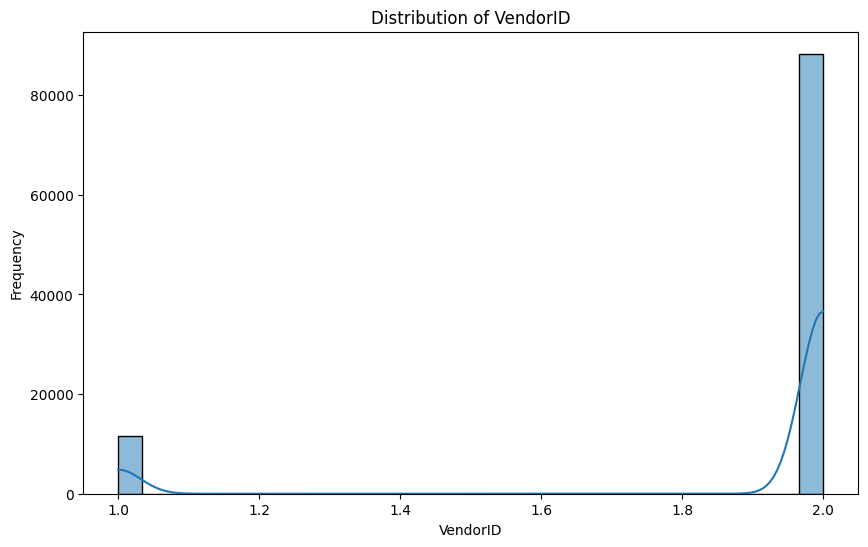

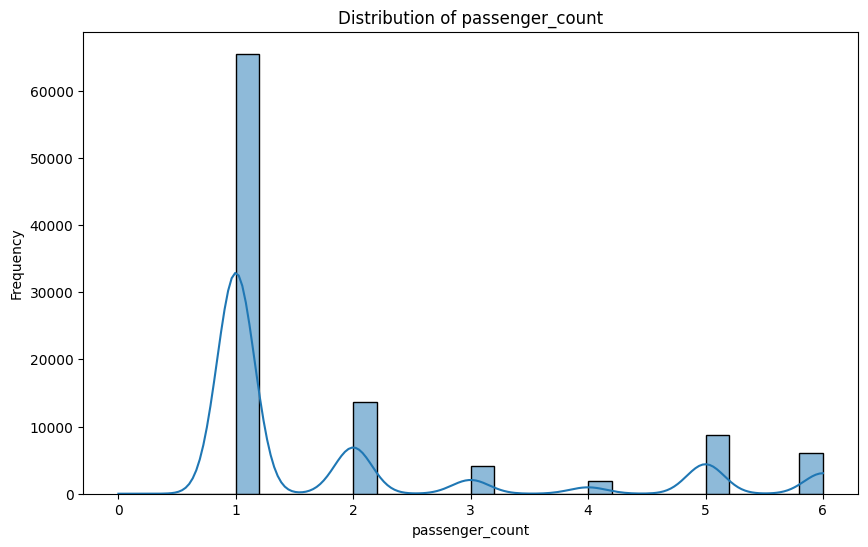

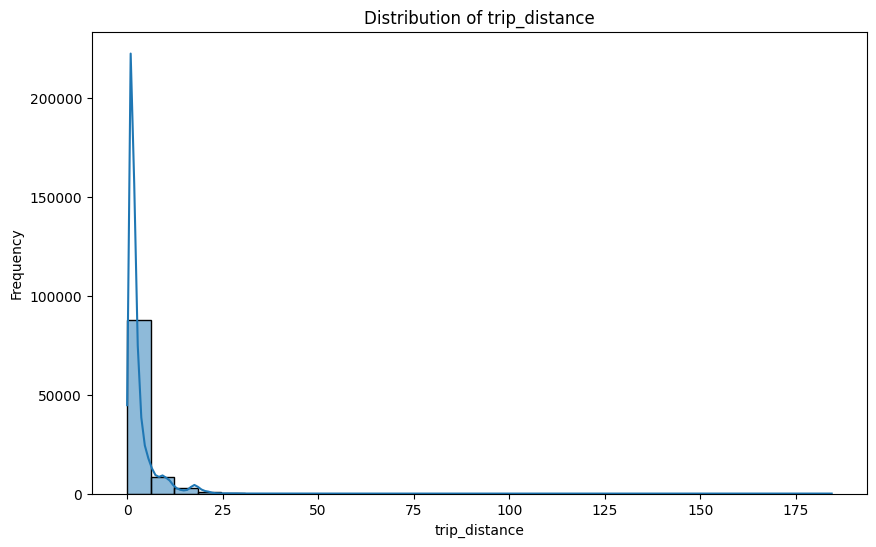

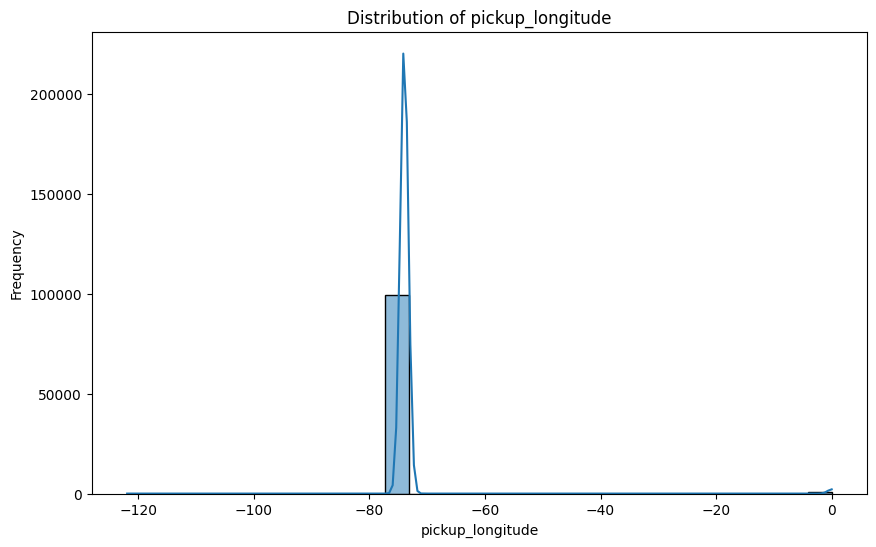

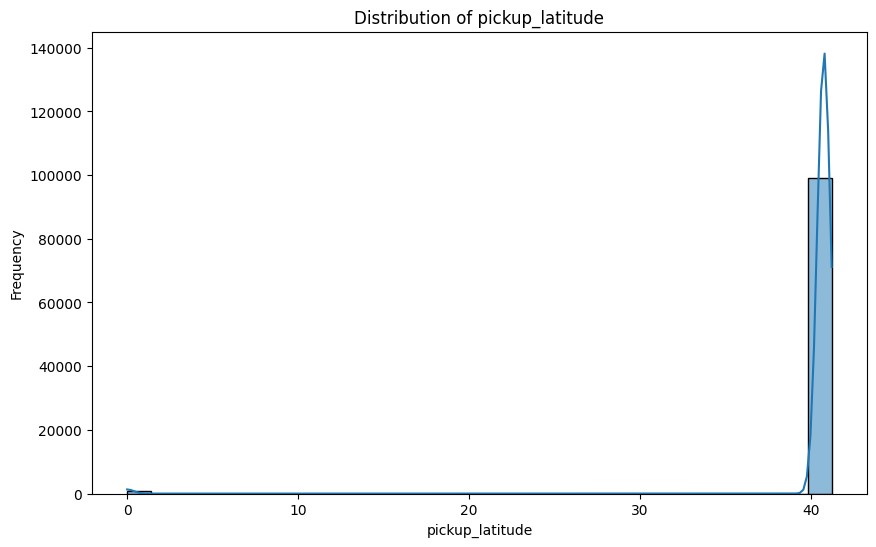

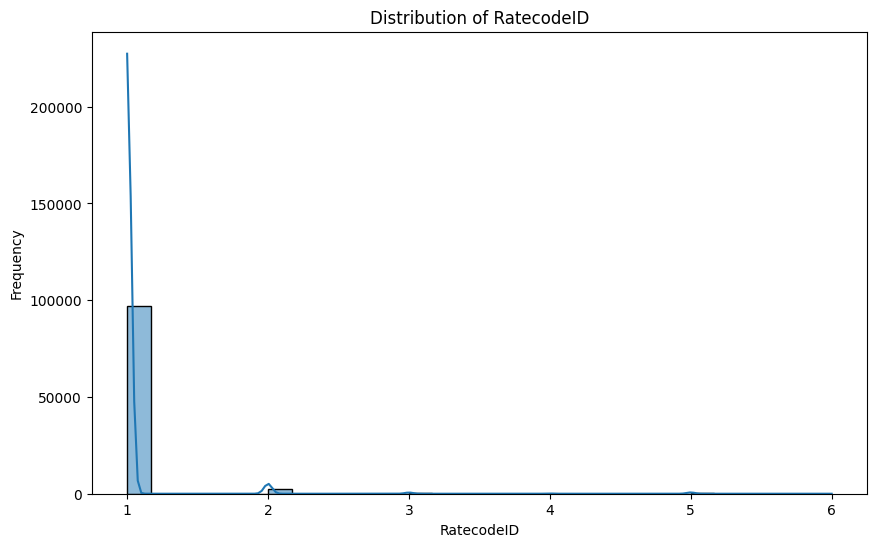

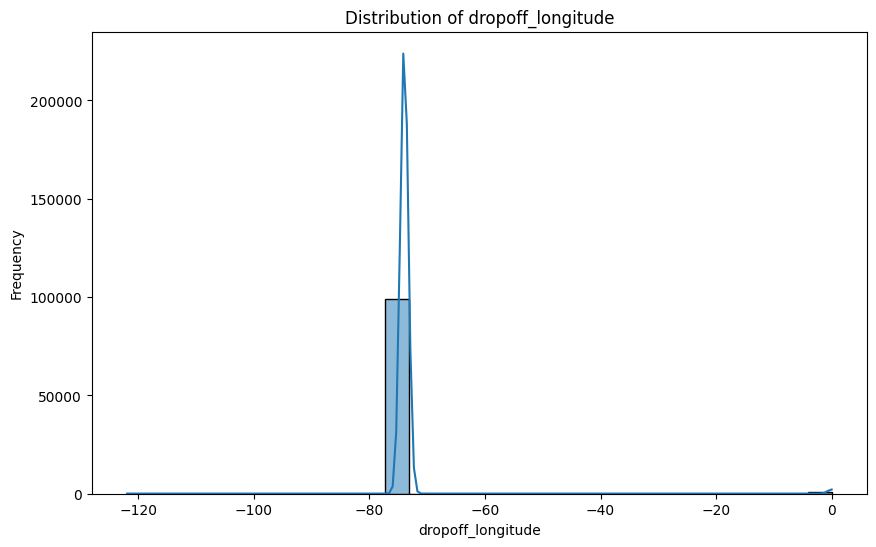

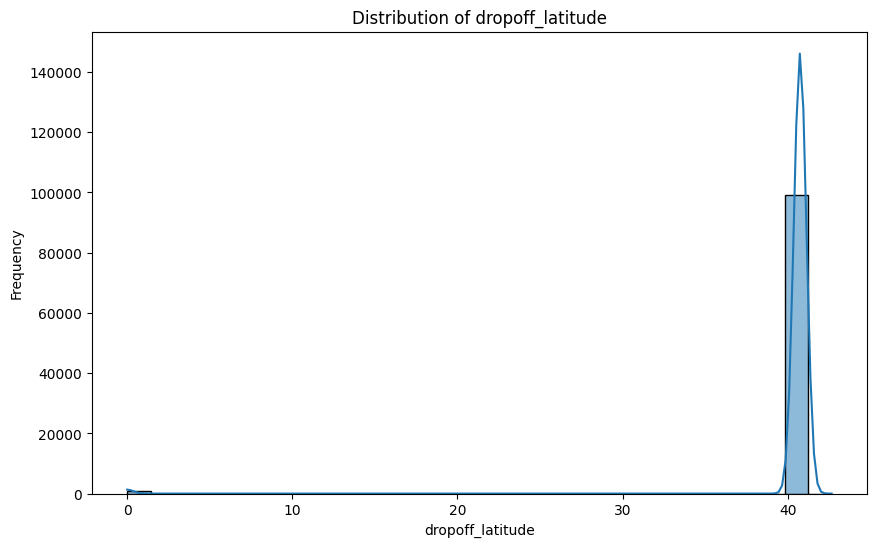

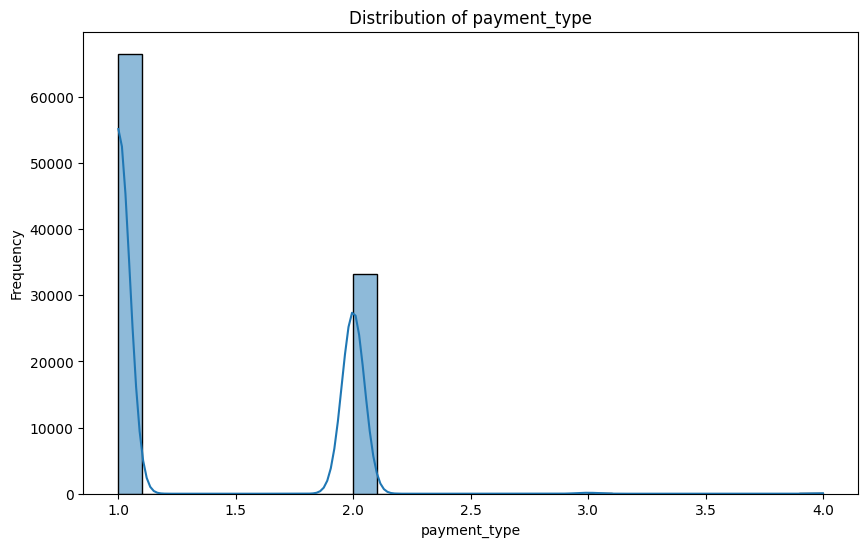

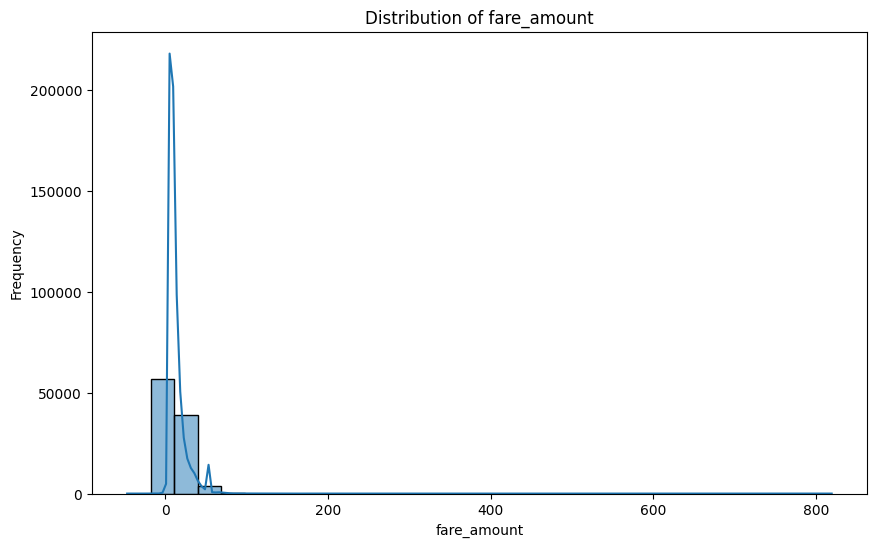

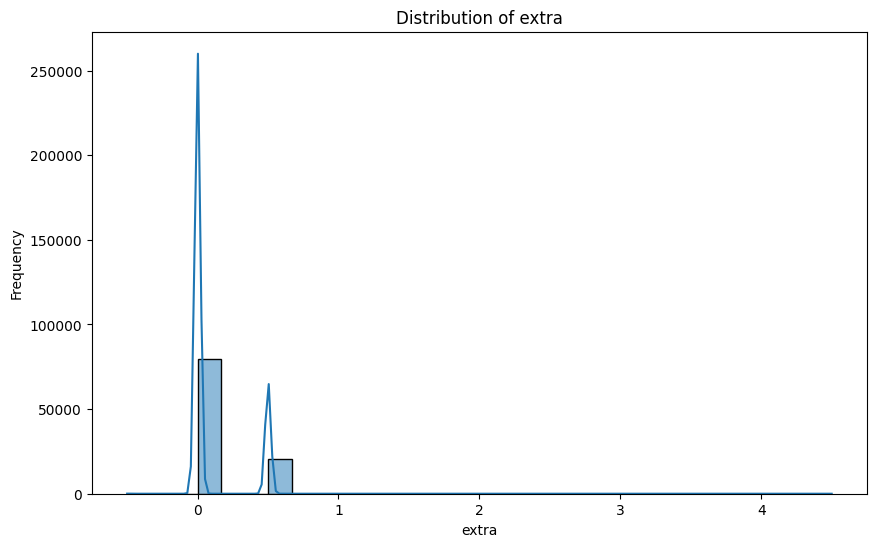

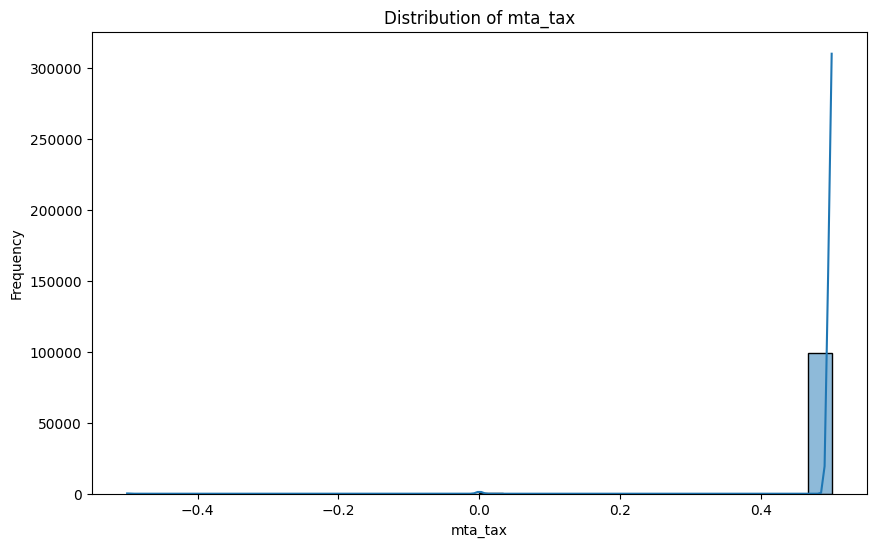

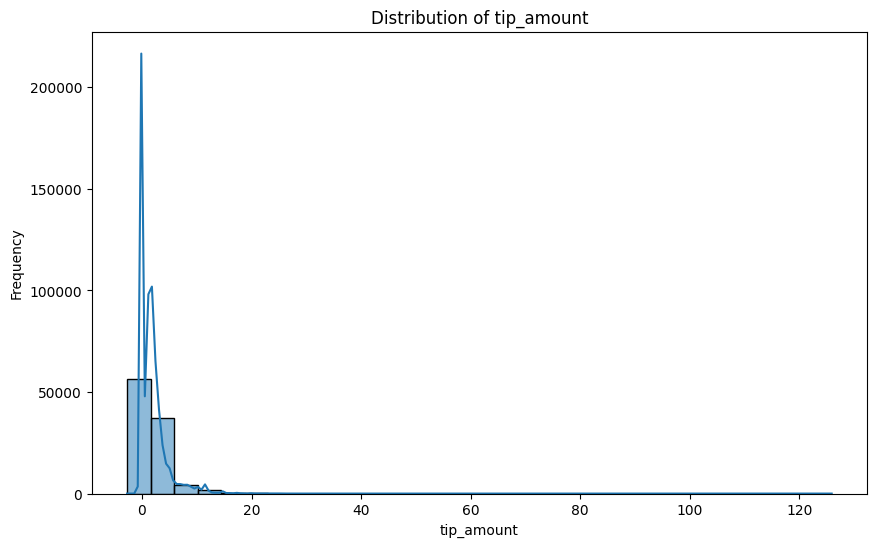

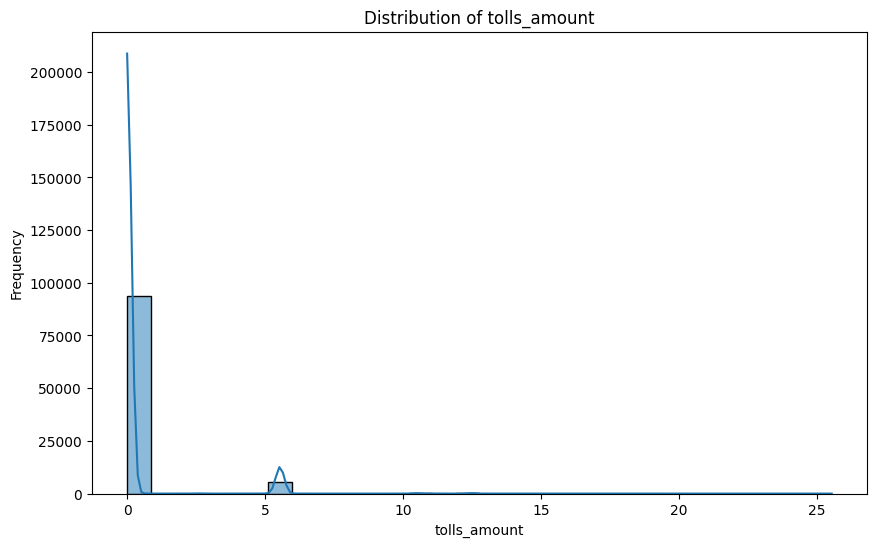

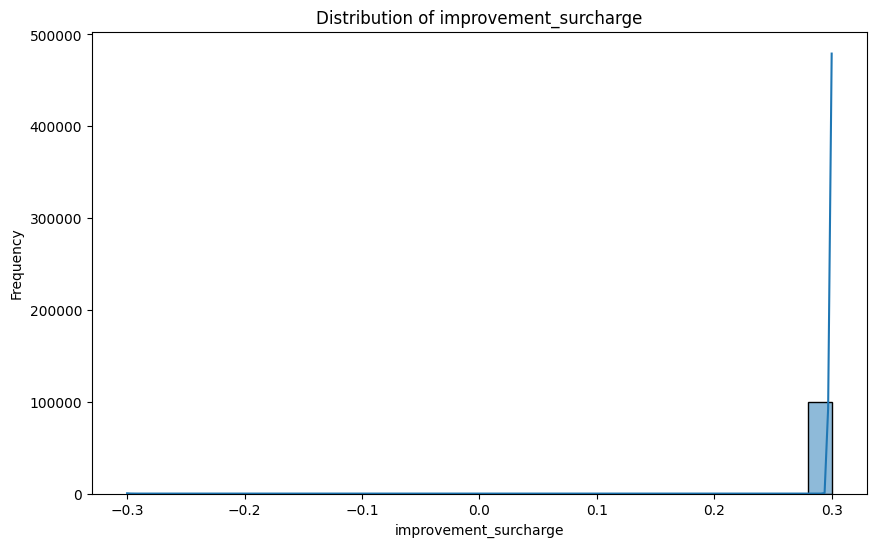

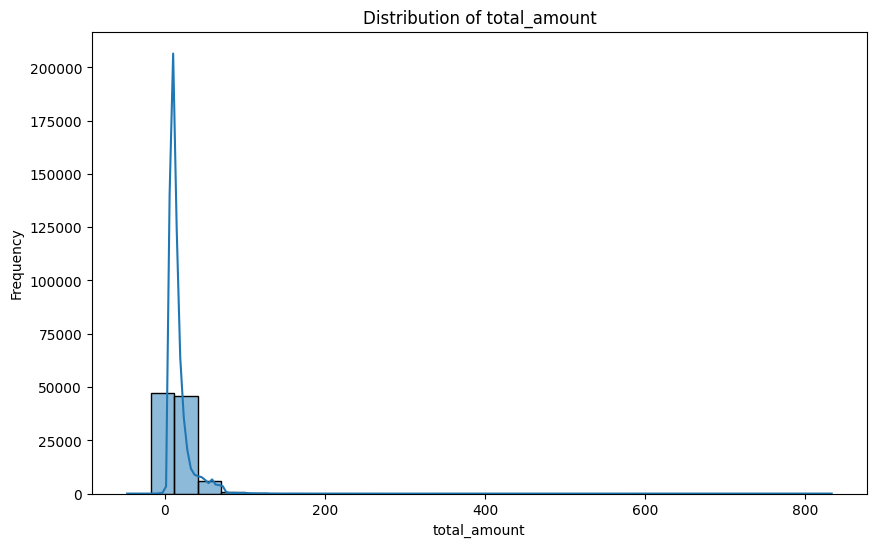

In [26]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()